<a href="https://www.kaggle.com/code/zeeshanahmadyar/customer-segmentation-using-k-means-clustering?scriptVersionId=292267495" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **🟢 Project Introduction**

In this project, we apply **K-Means clustering** on customer data to understand how unsupervised learning works with real life data.
Each customer is treated as a different accourding to their **spending habits**.

By using K-Means, we group similar customers together based on their **spending numbers**.

This project helps us understand dealing with **customers using unsupervised learning**.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers-segmentation/Mall_Customers.csv


# **Load Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/mall-customers-segmentation/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Check outliers**

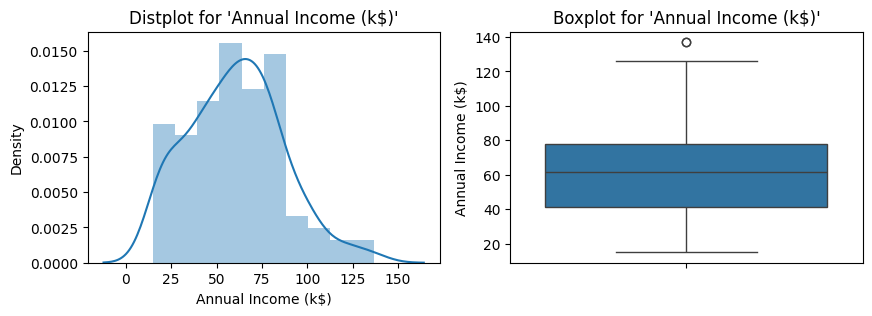

In [3]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.distplot(df['Annual Income (k$)'])
plt.title("Distplot for 'Annual Income (k$)'")

plt.subplot(1, 2, 2)
sns.boxplot(df['Annual Income (k$)'])
plt.title("Boxplot for 'Annual Income (k$)'")

plt.show()

# **Remove outliers using IQR Method**

In [4]:
upper_limit = df['Annual Income (k$)'].mean() + 3 * df['Annual Income (k$)'].std()
lower_limit = df['Annual Income (k$)'].mean() - 3 * df['Annual Income (k$)'].std()

In [5]:
# trimming
df = df[(df['Annual Income (k$)'] <= upper_limit) & (df['Annual Income (k$)'] >= lower_limit)]

# **Feature important Features**

In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# **Scaling Data for Model**

In [8]:
scaler = StandardScaler()

In [9]:
X_scaled = scaler.fit_transform(df)

# **Find best K Using Elbow Method**

In [10]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X_scaled)
    wcss.append(km.inertia_)

print(wcss)

[600.0, 389.3861889564371, 295.9682956968385, 205.22514747675922, 168.24758017556837, 133.86833362685582, 117.20494953452533, 105.42754009767143, 93.4778617756125, 82.27534896126306]


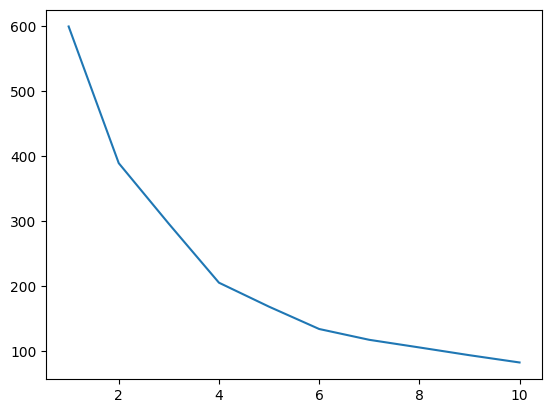

In [11]:
plt.plot(range(1, 11), wcss)

# **Create Instance**

In [12]:
km = KMeans(n_clusters=7, max_iter=300) # n_init=300
y_means = km.fit_predict(X_scaled)
y_means

array([2, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 1, 2, 6, 5,
       6, 2, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4,
       5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [13]:
# specific cluster
X_scaled[y_means == 1]

array([[ 1.87669894, -0.86110232, -0.59008772],
       [ 0.80019859, -0.78476346,  0.18634349],
       [ 0.7284319 , -0.70842461,  0.06987881],
       [ 1.4460988 , -0.67025518,  0.38045129],
       [ 0.80019859, -0.67025518, -0.20187212],
       [ 0.58489852, -0.67025518, -0.35715836],
       [ 0.87196528, -0.63208575, -0.00776431],
       [ 2.16376569, -0.63208575, -0.16305055],
       [ 1.01549866, -0.55574689, -0.16305055],
       [ 2.23553238, -0.55574689,  0.22516505],
       [ 2.02023231, -0.51757746,  0.06987881],
       [ 1.08726535, -0.51757746,  0.34162973],
       [ 1.73316556, -0.47940803,  0.03105725],
       [ 0.29783176, -0.47940803, -0.00776431],
       [ 2.091999  , -0.47940803, -0.08540743],
       [ 2.23553238, -0.4412386 ,  0.18634349],
       [ 0.58489852, -0.4412386 , -0.3183368 ],
       [ 1.51786549, -0.40306917, -0.04658587],
       [ 1.51786549, -0.40306917,  0.22516505],
       [ 1.4460988 , -0.25039146, -0.12422899],
       [ 0.44136514, -0.25039146,  0.108

# **Draw Cluster Graph**

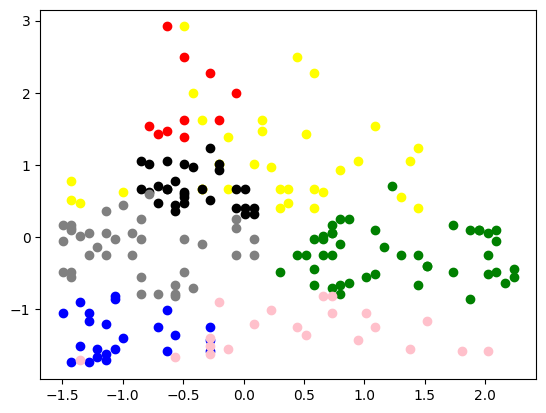

In [14]:
plt.scatter(X_scaled[y_means == 0, 0], X_scaled[y_means == 0, 1], color='red')
plt.scatter(X_scaled[y_means == 1, 0], X_scaled[y_means == 1, 1], color='green')
plt.scatter(X_scaled[y_means == 2, 0], X_scaled[y_means == 2, 1], color='blue')
plt.scatter(X_scaled[y_means == 3, 0], X_scaled[y_means == 3, 1], color='yellow')
plt.scatter(X_scaled[y_means == 4, 0], X_scaled[y_means == 4, 1], color='black')
plt.scatter(X_scaled[y_means == 5, 0], X_scaled[y_means == 5, 1], color='gray')
plt.scatter(X_scaled[y_means == 6, 0], X_scaled[y_means == 6, 1], color='pink')

# **🧾 Project Conclusion**

In this project, we used **K-Means clustering** to segment customers based on age, income, and spending behavior.
The **Elbow Method** helped us choose the optimal number of clusters.
This approach helps businesses understand customer groups and create targeted marketing strategies.